In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from pathlib import Path

# Read CSV into DataFrame
df = pd.read_csv("full_expanded_dataset_cleaned_stage_3.csv", sep=';')

# Display first few rows of the DataFrame
df.head()


,Row_number,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,...,pressure,distance,speed_kph,acceleration,slope,angle,is_moving,etopo1_elevation_filtered_ma_2_2,acceleration_filtered_ma_2_2,slope_filtered_ma_5_5
0,0.0,181.0,2023-08-01 03:44:12,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,...,1001.0,0.995167,0.056867,0.000028,0.000000,198.804829,0,30.0,0.000367,0.000000
1,2.0,183.0,2023-08-24 06:53:54,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,...,1014.3,1.397717,0.082488,-0.000446,0.000000,67.092106,0,38.0,0.000304,0.000000
2,4.0,143.0,2023-08-24 07:02:30,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,...,1014.9,2.750160,0.165010,0.000469,0.000000,155.914237,0,6.0,0.000061,0.000000
3,5.0,121.0,2023-08-24 07:06:16,50.404240,4.438329,40.0,41.0,220.0,210.0,798.0,...,1014.5,5.089610,0.305377,-0.000556,0.000000,136.467160,0,117.0,0.000056,0.000000
4,7.0,172.0,2023-08-24 07:34:24,51.066767,5.229784,43.0,39.0,175.0,265.0,802.0,...,1014.3,379.711163,22.782670,-0.051941,0.008264,6.891546,0,39.8,0.058127,0.008366


In [15]:
df.timestamps_UTC = pd.to_datetime(df.timestamps_UTC)
df.dtypes

Row_number                                 float64
mapped_veh_id                              float64
timestamps_UTC                      datetime64[ns]
lat                                        float64
lon                                        float64
RS_E_InAirTemp_PC1                         float64
RS_E_InAirTemp_PC2                         float64
RS_E_OilPress_PC1                          float64
RS_E_OilPress_PC2                          float64
RS_E_RPM_PC1                               float64
RS_E_RPM_PC2                               float64
RS_E_WatTemp_PC1                           float64
RS_E_WatTemp_PC2                           float64
RS_T_OilTemp_PC1                           float64
RS_T_OilTemp_PC2                           float64
etopo1_elevation                           float64
x                                          float64
y                                          float64
station                                    float64
round_time                     

In [6]:
df.describe() 

,Row_number,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,...,pressure,distance,speed_kph,acceleration,slope,angle,is_moving,etopo1_elevation_filtered_ma_2_2,acceleration_filtered_ma_2_2,slope_filtered_ma_5_5
count,1.036975e+07,1.036975e+07,10369747,1.036975e+07,1.036975e+07,1.036975e+07,1.036617e+07,1.036975e+07,1.036617e+07,1.036975e+07,...,1.036975e+07,1.036975e+07,1.036975e+07,1.036974e+07,1.036975e+07,1.036975e+07,1.036975e+07,1.036974e+07,1.036974e+07,1.036974e+07
mean,8.838894e+06,1.507178e+02,2023-05-14 00:01:38.104545792,5.087028e+01,4.232517e+00,3.226862e+01,3.210585e+01,2.700072e+02,2.767009e+02,9.324832e+02,...,1.017927e+03,3.799806e+02,2.275909e+01,1.034445e-04,-6.946501e-07,1.808431e+02,2.079468e-01,4.694160e+01,1.034522e-04,-6.859635e-07
min,0.000000e+00,1.020000e+02,2022-08-22 14:32:23,4.972954e+01,1.750491e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.766000e+02,0.000000e+00,-4.364810e-02,-8.445133e+01,-2.237705e+00,5.573236e-05,0.000000e+00,-1.100000e+01,-2.038102e+01,-3.141105e-01
25%,4.420624e+06,1.280000e+02,2023-03-14 02:48:37,5.077014e+01,3.712659e+00,2.200000e+01,2.200000e+01,2.070000e+02,2.100000e+02,7.980000e+02,...,1.012700e+03,1.874750e+00,1.124946e-01,-1.097802e-02,0.000000e+00,9.530549e+01,0.000000e+00,1.020000e+01,-5.586434e-03,-1.539890e-03
50%,8.838098e+06,1.510000e+02,2023-05-11 14:49:23,5.099726e+01,3.920153e+00,3.200000e+01,3.300000e+01,2.410000e+02,2.480000e+02,8.010000e+02,...,1.018000e+03,2.381856e+01,1.426173e+00,-2.148912e-06,0.000000e+00,1.794141e+02,0.000000e+00,2.700000e+01,1.392262e-05,0.000000e+00
75%,1.325941e+07,1.740000e+02,2023-07-09 08:54:30,5.108867e+01,4.535220e+00,4.000000e+01,3.900000e+01,3.240000e+02,3.340000e+02,8.130000e+02,...,1.024000e+03,6.116992e+02,3.739456e+01,9.508381e-03,0.000000e+00,2.742755e+02,0.000000e+00,4.740000e+01,5.966988e-03,1.572179e-03
max,1.767927e+07,1.970000e+02,2023-09-13 21:52:58,5.134353e+01,6.572482e+00,6.553500e+04,6.553500e+04,6.900000e+02,6.900000e+02,2.303000e+03,...,1.044300e+03,2.655367e+05,2.188594e+04,1.020899e+02,2.124031e+00,3.600000e+02,1.000000e+00,4.044000e+02,2.337678e+01,3.266361e-01
std,5.103385e+06,2.690365e+01,NaN,3.196065e-01,5.958668e-01,3.404130e+02,3.112493e+02,1.092243e+02,1.123585e+02,3.613989e+02,...,9.445041e+00,7.108173e+02,3.642445e+01,1.415721e-01,4.280261e-02,1.046861e+02,4.058386e-01,5.585163e+01,4.282722e-02,2.234995e-02


In [7]:
data = df[['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
           'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
           'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2',
           'temperature', 'speed_kph']]

# Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Find the absolute mean correlation for each variable
mean_corr = correlation_matrix.abs().mean()

# Sort the variables based on their mean correlation
sorted_variables = mean_corr.sort_values(ascending=False)

In [8]:
# Display the correlation matrix
correlation_matrix

,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,speed_kph
RS_E_InAirTemp_PC1,1.000000,0.304054,0.001571,-0.000889,0.003803,0.004226,0.001734,0.002067,0.002364,0.004808,0.007214,0.007588
RS_E_InAirTemp_PC2,0.304054,1.000000,0.003659,-0.000145,0.005548,0.004390,0.000289,0.004348,0.001644,0.004165,0.009421,0.009269
RS_E_OilPress_PC1,0.001571,0.003659,1.000000,0.667542,0.569807,0.514296,-0.131199,-0.115745,-0.218179,-0.182643,-0.054371,0.140948
RS_E_OilPress_PC2,-0.000889,-0.000145,0.667542,1.000000,0.506995,0.562969,-0.120048,-0.141039,-0.218751,-0.239626,-0.106667,0.133315
RS_E_RPM_PC1,0.003803,0.005548,0.569807,0.506995,1.000000,0.930606,0.328384,0.271489,0.310220,0.285257,0.036539,0.443874
RS_E_RPM_PC2,0.004226,0.004390,0.514296,0.562969,0.930606,1.000000,0.295272,0.310857,0.290743,0.307291,0.035975,0.441824
RS_E_WatTemp_PC1,0.001734,0.000289,-0.131199,-0.120048,0.328384,0.295272,1.000000,0.725847,0.868302,0.722307,0.225205,0.301553
RS_E_WatTemp_PC2,0.002067,0.004348,-0.115745,-0.141039,0.271489,0.310857,0.725847,1.000000,0.688235,0.856904,0.222988,0.281369
RS_T_OilTemp_PC1,0.002364,0.001644,-0.218179,-0.218751,0.310220,0.290743,0.868302,0.688235,1.000000,0.850021,0.226656,0.336711
RS_T_OilTemp_PC2,0.004808,0.004165,-0.182643,-0.239626,0.285257,0.307291,0.722307,0.856904,0.850021,1.000000,0.235423,0.331131


In [9]:
#mapped_veh_id has a relatively strong negative correlation with lat, lon, etopo1_elevation, y, and etopo1_elevation_filtered_ma_2_2. This might indicate a relationship between these variables.
#RS_E_RPM_PC1 and RS_E_RPM_PC2 show a strong positive correlation, which might imply they are related or measure similar aspects.
#is_moving has a strong positive correlation with RS_E_RPM_PC1, RS_E_RPM_PC2, and acceleration, indicating some interdependency.

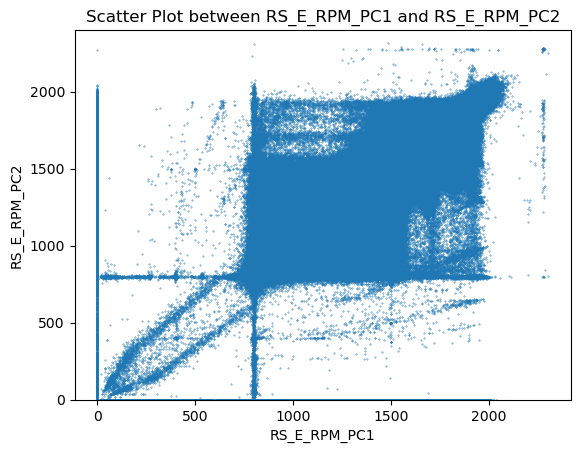

In [10]:
import matplotlib.pyplot as plt

# Example: Create a scatter plot for two highly correlated variables
plt.scatter(df['RS_E_RPM_PC1'], df['RS_E_RPM_PC2'], s=0.1)
plt.xlabel('RS_E_RPM_PC1')
plt.ylabel('RS_E_RPM_PC2')
plt.ylim(0, 2400)
plt.title('Scatter Plot between RS_E_RPM_PC1 and RS_E_RPM_PC2')
plt.show()

In [11]:
df.timestamps_UTC = pd.to_datetime(df.timestamps_UTC)

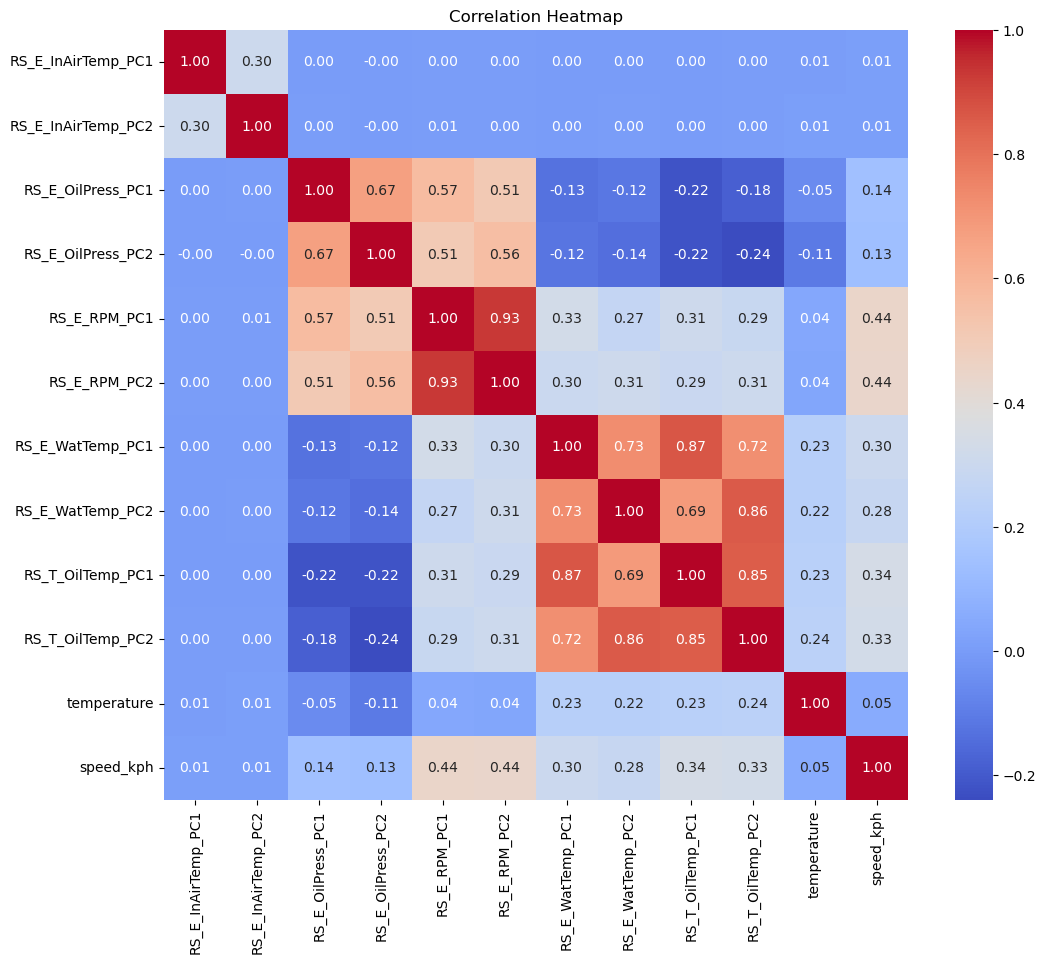

In [12]:
import seaborn as sns
data = df[['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
          'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
          'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
          'speed_kph']]
# Generate a heatmap of the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

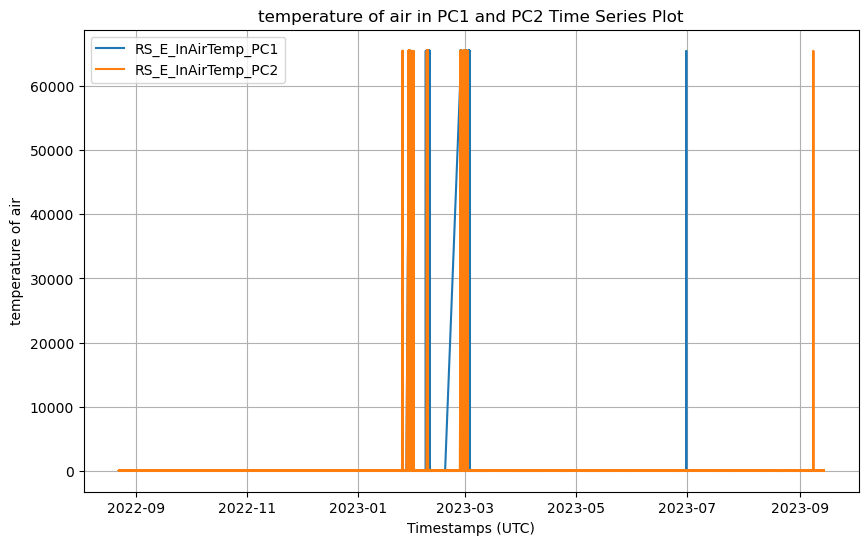

In [13]:
# Set 'timestamps_UTC' column as the index
df.set_index('timestamps_UTC', inplace=True)

# Plotting temperature of air in PC1 and PC2 on the same graph
plt.figure(figsize=(10, 6))

# List of variables to plot
variables_to_plot = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2']

for var in variables_to_plot:
    plt.plot(df.index, df[var], label=var)

plt.xlabel('Timestamps (UTC)')
plt.ylabel('temperature of air')
plt.title('temperature of air in PC1 and PC2 Time Series Plot')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#smoothing the varaibles using exponential smoothing
def exponential_smoothing(series, alpha):
    smoothed = [series[0]]  # Initial value is the first observation
    for i in range(1, len(series)):
        smoothed.append(alpha * series[i] + (1 - alpha) * smoothed[i - 1])
    return smoothed

# Select the columns corresponding to the variables you want to smooth
variables_to_smoothen = [
    'RS_E_InAirTemp_PC1',
    'RS_E_InAirTemp_PC2',
    'RS_E_OilPress_PC1',
    'RS_E_OilPress_PC2',
    'RS_E_RPM_PC1',
    'RS_E_RPM_PC2',
    'RS_E_WatTemp_PC1',
    'RS_E_WatTemp_PC2',
    'RS_T_OilTemp_PC1',
    'RS_T_OilTemp_PC2'
]

# Smoothing parameter
alpha = 0.2  # You can adjust this parameter

# Apply exponential smoothing to each variable
for variable in variables_to_smoothen:
    smoothed_values = exponential_smoothing(df[variable].tolist(), alpha)
    df[f'Smoothed_{variable}'] = smoothed_values

# Ensure the timestamp column is in datetime format
df['timestamps_UTC'] = pd.to_datetime(df['timestamps_UTC'])

# Print the DataFrame with smoothed values
df

,Row_number,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,...,Smoothed_RS_E_InAirTemp_PC1,Smoothed_RS_E_InAirTemp_PC2,Smoothed_RS_E_OilPress_PC1,Smoothed_RS_E_OilPress_PC2,Smoothed_RS_E_RPM_PC1,Smoothed_RS_E_RPM_PC2,Smoothed_RS_E_WatTemp_PC1,Smoothed_RS_E_WatTemp_PC2,Smoothed_RS_T_OilTemp_PC1,Smoothed_RS_T_OilTemp_PC2
0,0.0,181.0,2023-08-01 03:44:12,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,...,27.000000,23.000,255.000000,238.0000,794.000000,801.0000,83.000000,81.0000,76.000000,77.0
1,2.0,183.0,2023-08-24 06:53:54,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,...,27.800000,25.000,250.800000,226.8000,795.000000,801.2000,82.800000,81.2000,77.800000,79.0
2,4.0,143.0,2023-08-24 07:02:30,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,...,30.440000,26.800,246.040000,237.8400,797.200000,800.9600,83.240000,80.5600,78.640000,79.0
3,5.0,121.0,2023-08-24 07:06:16,50.404240,4.438329,40.0,41.0,220.0,210.0,798.0,...,32.352000,29.640,240.832000,232.2720,797.360000,801.5680,83.992000,81.8480,79.912000,80.0
4,7.0,172.0,2023-08-24 07:34:24,51.066767,5.229784,43.0,39.0,175.0,265.0,802.0,...,34.481600,31.512,227.665600,238.8176,798.288000,820.8544,84.193600,81.8784,81.529600,81.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10369743,17679266.0,176.0,2023-05-28 19:19:58,51.125641,3.668752,33.0,36.0,179.0,196.0,805.0,...,37.766911,NaN,217.149104,NaN,784.560494,NaN,82.969125,NaN,83.831012,NaN
10369744,17679267.0,180.0,2023-05-28 19:19:46,50.868831,3.814357,40.0,31.0,244.0,234.0,801.0,...,38.213529,NaN,222.519283,NaN,787.848395,NaN,83.975300,NaN,84.464809,NaN
10369745,17679270.0,122.0,2023-05-28 20:23:20,51.015686,3.775316,52.0,42.0,3.0,3.0,0.0,...,40.970823,NaN,178.615427,NaN,630.278716,NaN,82.780240,NaN,83.571848,NaN
10369746,17679271.0,177.0,2023-05-28 20:46:00,51.189586,5.109380,27.0,38.0,417.0,469.0,1441.0,...,38.176658,NaN,226.292341,NaN,792.422973,NaN,81.624192,NaN,82.057478,NaN


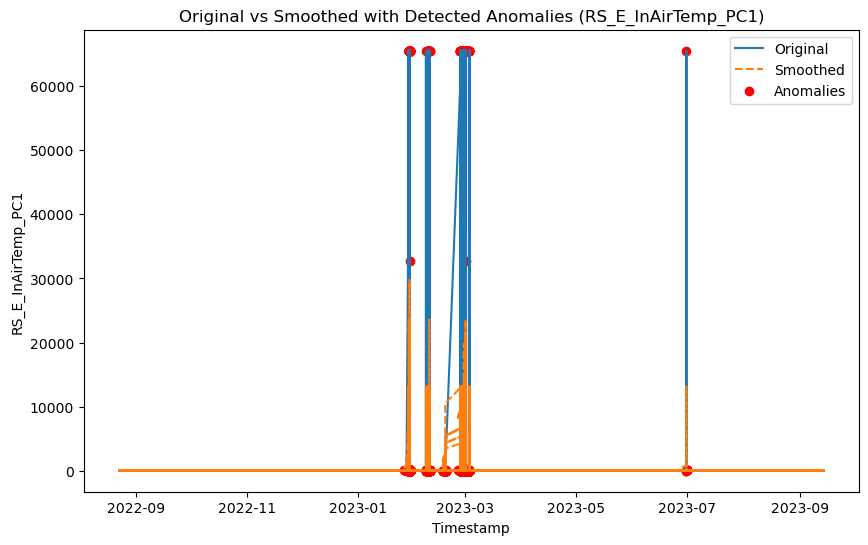

Detected Anomalies:
              timestamps_UTC  RS_E_InAirTemp_PC1  Smoothed_RS_E_InAirTemp_PC1  \
181405   2023-02-26 06:27:31             65535.0                 13123.496902   
181406   2023-02-26 06:35:34                 2.0                 10499.197521   
181407   2023-02-26 06:38:57                 3.0                  8399.958017   
181408   2023-02-26 06:47:29                 2.0                  6720.366414   
181409   2023-02-26 07:49:36                11.0                  5378.493131   
...                      ...                 ...                          ...   
10210549 2023-01-29 10:14:12                29.0                  2506.975131   
10210550 2023-01-29 10:37:24                25.0                  2010.580105   
10210551 2023-01-29 10:36:56                 2.0                  1608.864084   
10210552 2023-01-29 10:37:02                14.0                  1289.891267   
10210553 2023-01-29 10:44:47                29.0                  1037.713014   

       

In [17]:
#Anomalie Detection model variable 1
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_E_InAirTemp_PC1'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original')
plt.plot(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', linestyle='--')
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

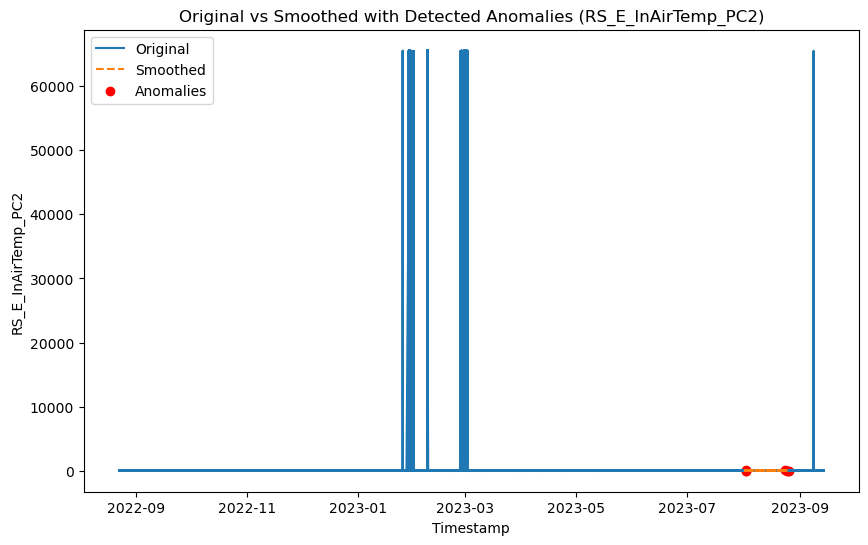

Detected Anomalies:
         timestamps_UTC  RS_E_InAirTemp_PC2  Smoothed_RS_E_InAirTemp_PC2  \
87  2023-08-23 22:42:39                61.0                    40.742851   
333 2023-08-24 15:11:04                 0.0                    28.220040   
438 2023-08-25 17:14:40                 0.0                    27.256249   
450 2023-08-02 10:00:32                 0.0                    27.209610   
605 2023-08-25 02:55:19                 0.0                    26.487482   
676 2023-08-02 06:40:54                68.0                    41.374204   
677 2023-08-02 07:38:06                16.0                    36.299363   

     Residuals  
87   20.257149  
333 -28.220040  
438 -27.256249  
450 -27.209610  
605 -26.487482  
676  26.625796  
677 -20.299363  


In [18]:
#Anomalie Detection model variable 2
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_E_InAirTemp_PC2'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original')
plt.plot(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', linestyle='--')
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

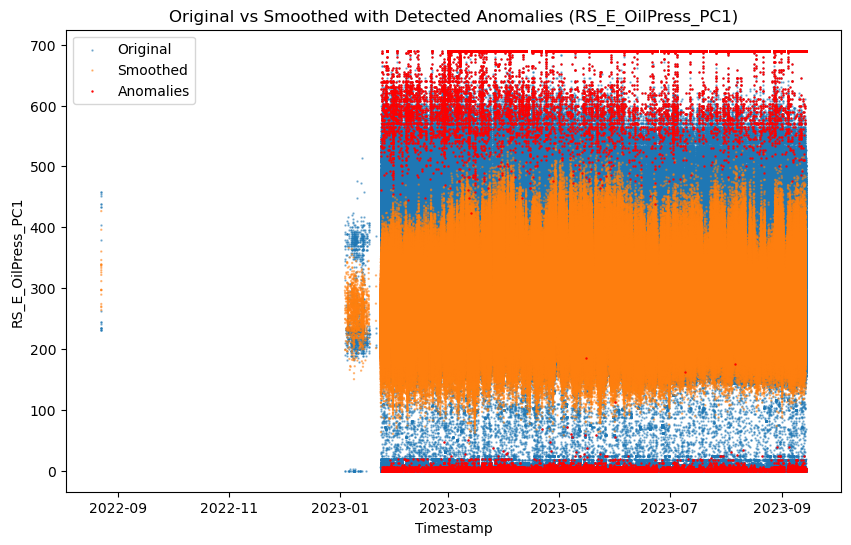

Detected Anomalies:
              timestamps_UTC  RS_E_OilPress_PC1  Smoothed_RS_E_OilPress_PC1  \
491      2023-08-02 09:23:44              690.0                  317.122718   
544      2023-08-02 06:54:34              690.0                  358.577462   
558      2023-08-02 12:55:40              690.0                  333.436244   
677      2023-08-02 07:38:06              576.0                  270.932088   
724      2023-08-02 05:54:37              690.0                  323.349687   
...                      ...                ...                         ...   
10369655 2023-05-07 09:44:15              690.0                  331.510157   
10369699 2023-05-28 05:30:12              690.0                  380.236510   
10369727 2023-05-28 12:01:17              690.0                  315.110604   
10369732 2023-05-28 14:20:20              690.0                  341.781523   
10369738 2023-05-28 17:29:21              690.0                  338.097607   

           Residuals  
491     

In [19]:
#Anomalie Detection model variable 3
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_E_OilPress_PC1'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original', s=0.5, alpha=0.5)
plt.scatter(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', linestyle='--', s=0.5, alpha=0.5)
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies', s=0.5)
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

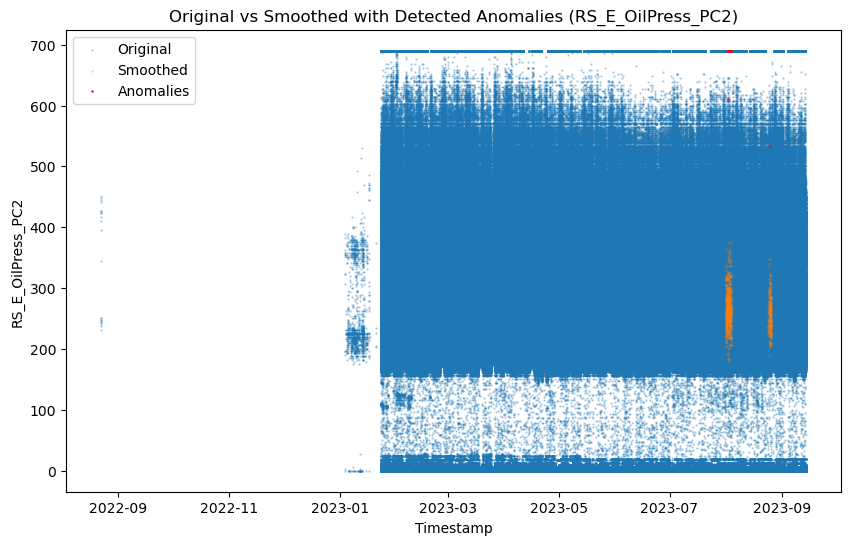

Detected Anomalies:
         timestamps_UTC  RS_E_OilPress_PC2  Smoothed_RS_E_OilPress_PC2  \
475 2023-08-25 10:18:56              534.0                  289.230012   
491 2023-08-02 09:23:44              690.0                  335.508708   
544 2023-08-02 06:54:34              690.0                  346.142571   
558 2023-08-02 12:55:40              690.0                  342.190199   
677 2023-08-02 07:38:06              610.0                  276.932818   
724 2023-08-02 05:54:37              690.0                  349.069993   
769 2023-08-03 17:22:50              690.0                  316.499401   
774 2023-08-03 03:31:31              690.0                  356.628284   
802 2023-08-03 03:16:33              690.0                  340.967515   
827 2023-08-03 16:32:54              690.0                  375.890087   
911 2023-08-03 17:01:56              690.0                  346.096271   
926 2023-08-03 06:59:37              690.0                  373.780522   

      Residuals  

In [20]:
#Anomalie Detection model variable 4
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_E_OilPress_PC2'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original', s=0.5, alpha=0.3)
plt.scatter(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', s=0.5, alpha=0.3)
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies', s=0.5)
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

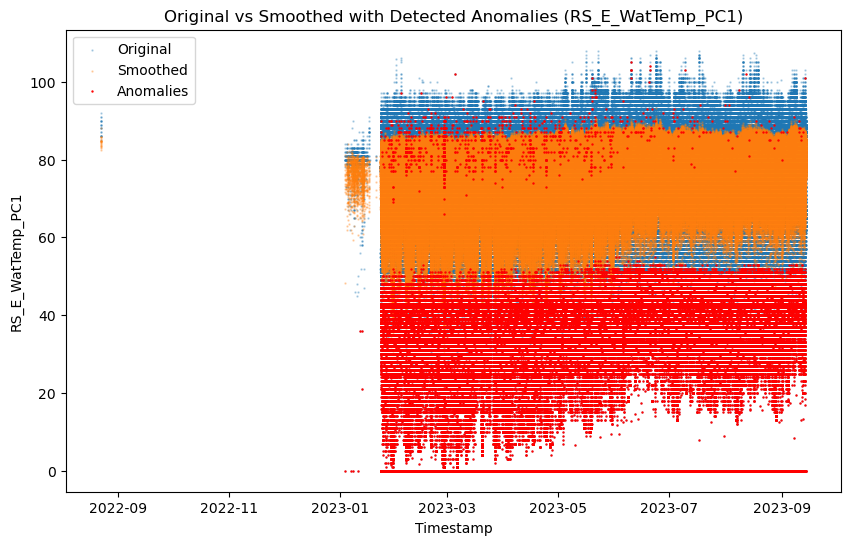

Detected Anomalies:
              timestamps_UTC  RS_E_WatTemp_PC1  Smoothed_RS_E_WatTemp_PC1  \
27       2023-08-24 13:57:51              51.0                  77.524467   
77       2023-08-01 09:51:41              42.0                  71.815270   
333      2023-08-24 15:11:04               0.0                  68.117241   
427      2023-08-02 01:48:09              49.0                  77.344259   
438      2023-08-25 17:14:40               0.0                  62.734897   
...                      ...               ...                        ...   
10369631 2023-05-07 04:41:51              32.0                  59.474831   
10369637 2023-05-07 05:46:09              20.0                  49.034298   
10369673 2023-05-07 15:34:44              40.0                  66.574799   
10369694 2023-05-28 03:12:23              47.0                  74.693723   
10369697 2023-05-28 05:00:49              26.0                  67.763186   

          Residuals  
27       -26.524467  
77       -2

In [21]:
#Anomalie Detection model variable 5
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_E_WatTemp_PC1'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original', s=0.5, alpha=0.3)
plt.scatter(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', s=0.5, alpha=0.3)
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies', s=0.5)
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

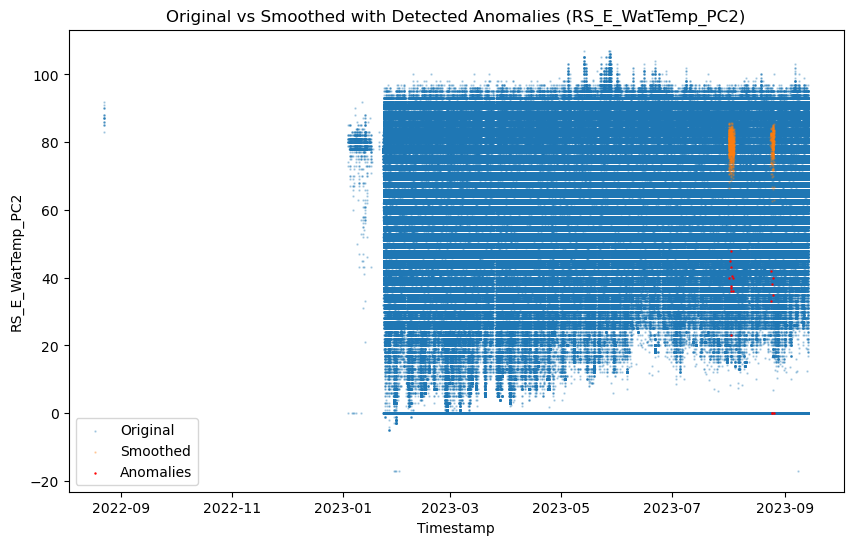

Detected Anomalies:
         timestamps_UTC  RS_E_WatTemp_PC2  Smoothed_RS_E_WatTemp_PC2  \
27  2023-08-24 13:57:51              42.0                  74.090576   
77  2023-08-01 09:51:41              40.0                  72.526523   
211 2023-08-24 08:18:59              33.0                  70.528776   
333 2023-08-24 15:11:04               0.0                  66.761158   
427 2023-08-02 01:48:09              48.0                  75.448921   
438 2023-08-25 17:14:40               0.0                  63.053291   
450 2023-08-02 10:00:32              37.5                  70.911293   
475 2023-08-25 10:18:56              35.0                  72.204582   
495 2023-08-25 01:58:03              38.0                  71.896785   
524 2023-08-01 23:14:51              45.0                  71.407215   
605 2023-08-25 02:55:19               0.0                  62.589455   
616 2023-08-25 06:49:16              40.0                  71.863996   
629 2023-08-02 02:15:32              43.0   

In [22]:
#Anomalie Detection model variable 6
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_E_WatTemp_PC2'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original', s=0.5, alpha=0.3)
plt.scatter(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', s=0.5, alpha=0.3)
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies', s=0.5)
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

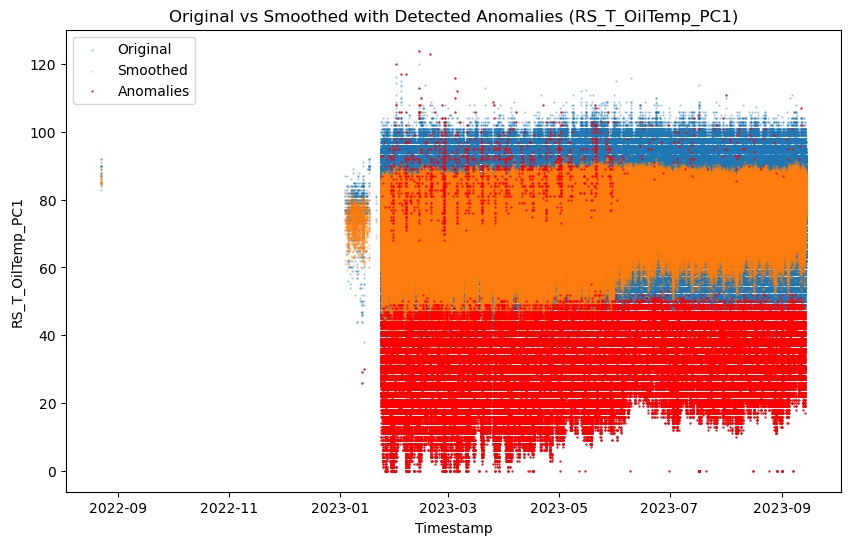

Detected Anomalies:
              timestamps_UTC  RS_T_OilTemp_PC1  Smoothed_RS_T_OilTemp_PC1  \
27       2023-08-24 13:57:51              42.0                  75.501418   
77       2023-08-01 09:51:41              27.0                  66.339922   
211      2023-08-24 08:18:59              36.0                  67.703372   
339      2023-08-01 01:51:41              43.0                  73.035854   
427      2023-08-02 01:48:09              41.0                  75.166881   
...                      ...               ...                        ...   
10369638 2023-05-07 06:00:24              81.0                  47.919853   
10369640 2023-05-07 06:28:35              91.0                  61.348706   
10369673 2023-05-07 15:34:44              23.0                  60.778013   
10369697 2023-05-28 05:00:49              19.0                  65.388251   
10369702 2023-05-28 06:24:20              33.0                  62.149942   

          Residuals  
27       -33.501418  
77       -3

In [23]:
#Anomalie Detection model variable 7
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_T_OilTemp_PC1'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original', s=0.5, alpha=0.3)
plt.scatter(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', s=0.5, alpha=0.3)
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies', s=0.3)
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

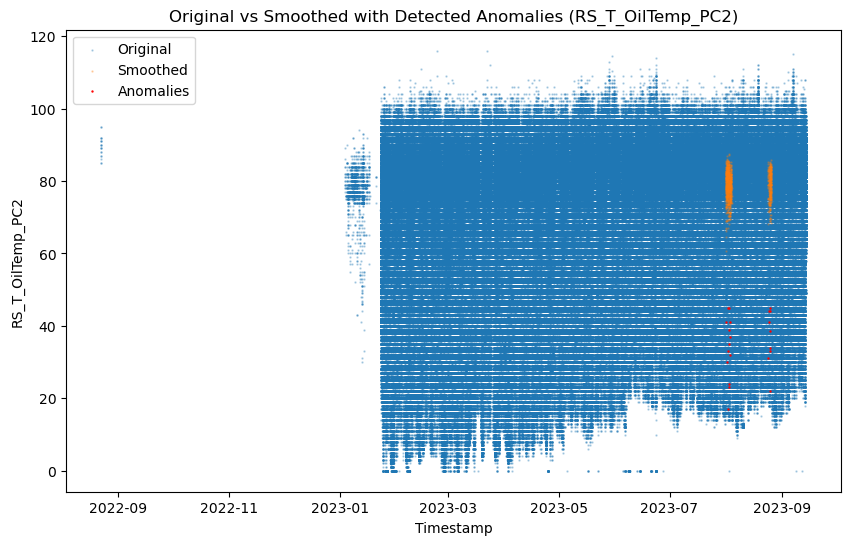

Detected Anomalies:
         timestamps_UTC  RS_T_OilTemp_PC2  Smoothed_RS_T_OilTemp_PC2  \
27  2023-08-24 13:57:51              41.0                  74.232855   
71  2023-08-24 11:56:17              44.0                  73.354356   
77  2023-08-01 09:51:41              30.0                  69.274204   
211 2023-08-24 08:18:59              31.0                  68.197293   
288 2023-08-25 02:13:02              45.0                  74.690781   
339 2023-08-01 01:51:41              41.0                  72.863741   
427 2023-08-02 01:48:09              45.0                  74.665828   
457 2023-08-25 04:11:22              38.5                  70.592746   
475 2023-08-25 10:18:56              22.0                  69.475993   
495 2023-08-25 01:58:03              33.0                  68.868306   
580 2023-08-25 10:44:54              44.0                  75.640305   
616 2023-08-25 06:49:16              34.0                  69.812517   
624 2023-08-02 20:40:40              39.0   

In [24]:
#Anomalie Detection model variable 8
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_T_OilTemp_PC2'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original', s=0.5, alpha=0.3)
plt.scatter(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', s=0.5, alpha=0.3)
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies', s=0.5)
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

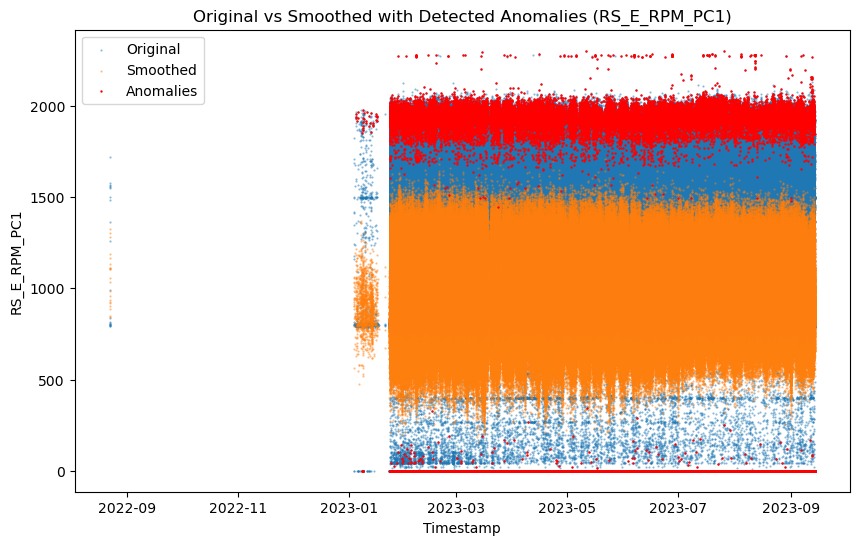

Detected Anomalies:
              timestamps_UTC  RS_E_RPM_PC1  Smoothed_RS_E_RPM_PC1   Residuals
23       2023-08-01 07:02:27           0.0             911.510856 -911.510856
81       2023-08-01 14:08:16        1962.0            1040.521165  921.478835
97       2023-08-01 04:08:32        1960.0            1024.974617  935.025383
156      2023-08-25 10:47:21           0.0             908.996397 -908.996397
333      2023-08-24 15:11:04           0.0             903.169834 -903.169834
...                      ...           ...                    ...         ...
10369056 2023-05-14 13:43:17        1933.0            1011.159846  921.840154
10369187 2023-05-01 21:19:55           0.0             940.015028 -940.015028
10369366 2023-05-21 21:19:32           0.0             993.569487 -993.569487
10369423 2023-05-19 21:54:35           0.0             947.570121 -947.570121
10369645 2023-05-07 07:31:13           0.0             904.074248 -904.074248

[57925 rows x 4 columns]


In [25]:
#Anomalie Detection model variable 9
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_E_RPM_PC1'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original', s=0.3, alpha=0.5)
plt.scatter(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', s=0.3, alpha=0.5)
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies', s=0.5)
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

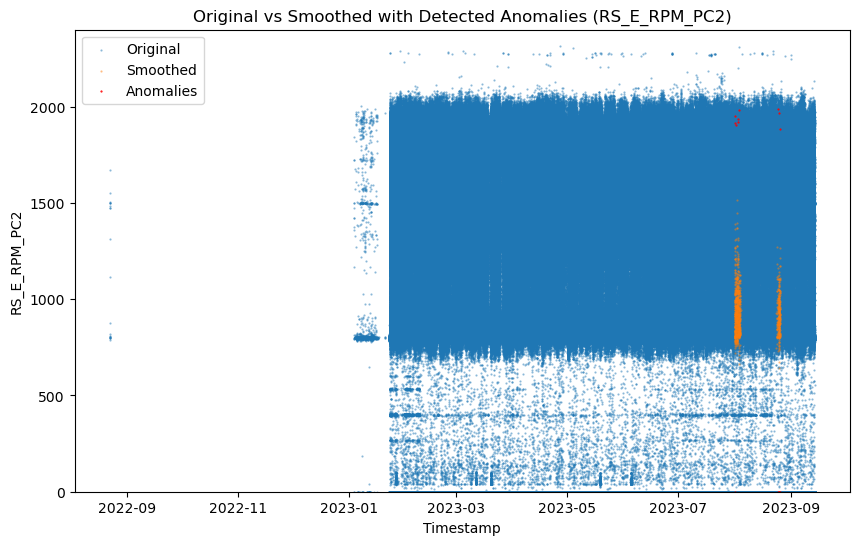

Detected Anomalies:
         timestamps_UTC  RS_E_RPM_PC2  Smoothed_RS_E_RPM_PC2   Residuals
23  2023-08-01 07:02:27           0.0             923.327712 -923.327712
33  2023-08-24 16:25:57        1988.0            1102.767112  885.232888
81  2023-08-01 14:08:16        1907.0            1037.027043  869.972957
97  2023-08-01 04:08:32        1950.0            1019.383155  930.616845
156 2023-08-25 10:47:21           0.0             909.457966 -909.457966
170 2023-08-25 19:42:11        1884.0            1021.888995  862.111005
267 2023-08-25 12:59:21           0.0             864.859652 -864.859652
275 2023-08-01 09:46:27        1916.0            1032.780334  883.219666
314 2023-08-25 14:26:10        1966.0            1099.739334  866.260666
333 2023-08-24 15:11:04           0.0             889.418105 -889.418105
438 2023-08-25 17:14:40           0.0             896.089216 -896.089216
514 2023-08-02 18:17:12        1935.0            1066.589826  868.410174
571 2023-08-02 17:32:14        

In [27]:
#Anomalie Detection model variable 10
# Choose the variable and its corresponding smoothed column
variable_to_detect_anomalies = 'RS_E_RPM_PC2'
smoothed_variable = f'Smoothed_{variable_to_detect_anomalies}'

# Calculate residuals (difference between original and smoothed values)
df['Residuals'] = df[variable_to_detect_anomalies] - df[smoothed_variable]

# Calculate mean and standard deviation of the residuals
mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()

# Set a threshold (e.g., using standard deviations)
threshold = 3 * std_residuals  # Adjust as needed

# Detect anomalies based on the threshold
anomalies = df[abs(df['Residuals']) > threshold]

# Visualize anomalies against smoothed and original data
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamps_UTC'], df[variable_to_detect_anomalies], label='Original', s=0.3, alpha=0.5)
plt.scatter(df['timestamps_UTC'], df[smoothed_variable], label='Smoothed', s=0.3, alpha=0.5)
plt.scatter(anomalies['timestamps_UTC'], anomalies[variable_to_detect_anomalies], color='red', label='Anomalies', s=0.3)
plt.xlabel('Timestamp')
plt.ylabel(variable_to_detect_anomalies)
plt.title(f'Original vs Smoothed with Detected Anomalies ({variable_to_detect_anomalies})')
plt.legend()
plt.ylim(0, 2400)
plt.show()

# Display the anomalies
print("Detected Anomalies:")
print(anomalies[['timestamps_UTC', variable_to_detect_anomalies, smoothed_variable, 'Residuals']])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM


In [6]:
df = pd.read_csv("full_expanded_dataset_cleaned_stage_3_nano.csv", sep=';')
df.timestamps_UTC = pd.to_datetime(df.timestamps_UTC)

# Selecting relevant columns for anomaly detection
selected_columns = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2',
                    'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2',
                    'temperature', 'rel_hum', 'precipitation', 'pressure']

# Extracting selected columns from the DataFrame
data = df[selected_columns].copy()  # Creating a copy to avoid warnings

# Handling missing values using .loc
for column in data.columns:
    data.loc[:, column].fillna(data.loc[:, column].mean(), inplace=True)

# Standardizing the data (scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create One-Class SVM model
svm = OneClassSVM(nu=0.05, verbose=True)  # You can adjust the nu parameter
svm.fit(scaled_data)

# Predicting anomalies (1 for normal, -1 for anomalies)
predictions = svm.predict(scaled_data)

# Counting the number of anomalies detected
num_anomalies = len(predictions[predictions == -1])
print(f"Number of anomalies detected: {num_anomalies}")

[LibSVM]Number of anomalies detected: 20841
